In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
df = pd.read_excel('/content/sample_data/Environment Solar Data.xlsx')
coords = df[["Latitude", "Longitude"]].values

FileNotFoundError: ignored

In [ ]:
df

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices
0,2018-01-01,0.220,0.270,45.36,2.560,304.0
1,2018-01-01,0.280,0.230,34.02,3.216,318.0
2,2018-01-01,0.280,0.270,45.36,3.144,102.0
3,2018-01-01,0.350,0.200,30.78,3.664,248.0
4,2018-01-01,0.180,0.300,33.21,2.632,326.0
...,...,...,...,...,...,...
3299,2022-08-01,0.873,0.379,170.40,4.410,115.0
3300,2022-08-01,0.856,0.100,160.00,3.852,112.0
3301,2022-08-01,0.233,0.623,122.40,3.015,73.0
3302,2022-08-01,0.567,0.727,181.60,3.870,149.0


In [ ]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


Number of clusters: 56


In [ ]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)


In [ ]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Longitude':lons, 'Latitude':lats})


In [ ]:
rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) & (df['Longitude']==row['Longitude'])].iloc[0], axis=1)


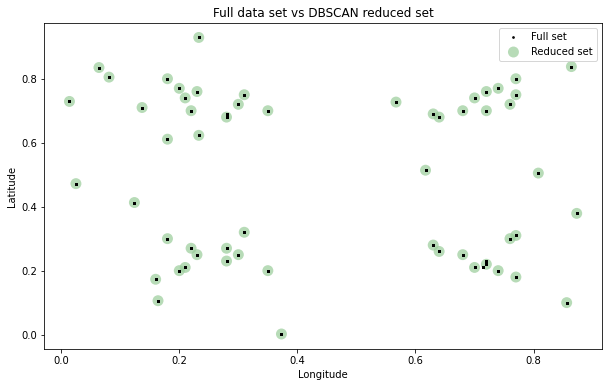

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

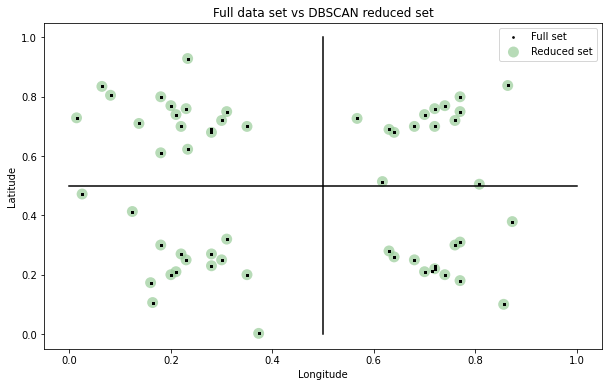

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.plot([0, 1.0], [0.5, 0.5], 'k-') # draw x-axis
plt.plot([0.5, 0.5], [0, 1.0], 'k-') # draw y-axis
plt.show()

# Another Solution

In [5]:
solar = pd.read_excel("/content/sample_data/Installed Solar Plants.xlsx")
solar.head()


NameError: ignored

In [4]:
solar.plot(figsize = (15,6))

NameError: ignored

In [ ]:
df.head()

,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices
0,2018-01-01,0.22,0.27,45.36,2.560,304.0
1,2018-01-01,0.28,0.23,34.02,3.216,318.0
2,2018-01-01,0.28,0.27,45.36,3.144,102.0
3,2018-01-01,0.35,0.20,30.78,3.664,248.0
4,2018-01-01,0.18,0.30,33.21,2.632,326.0


In [ ]:
df.isnull().sum()

Date               0
Longitude          0
Latitude           0
Sunhine Hours      2
Avg. Wind Speed    1
Property prices    1
dtype: int64

In [ ]:
df=df.dropna().reset_index()
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df["week"] = df['Date'].dt.week
df.head()

,index,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,year,month,day,week
0,0,2018-01-01,0.22,0.27,45.36,2.560,304.0,2018,1,1,1
1,1,2018-01-01,0.28,0.23,34.02,3.216,318.0,2018,1,1,1
2,2,2018-01-01,0.28,0.27,45.36,3.144,102.0,2018,1,1,1
3,3,2018-01-01,0.35,0.20,30.78,3.664,248.0,2018,1,1,1
4,4,2018-01-01,0.18,0.30,33.21,2.632,326.0,2018,1,1,1


In [ ]:
import datetime as dt

In [ ]:
df.groupby("year")['Property prices'].agg({"sum","mean", "median"})

,mean,median,sum
year,,,
2018,146.618980,126.0,103513.0
2019,146.857143,126.0,103828.0
2020,146.779661,126.0,103920.0
2021,146.871287,126.0,103838.0
2022,146.779661,126.0,69280.0


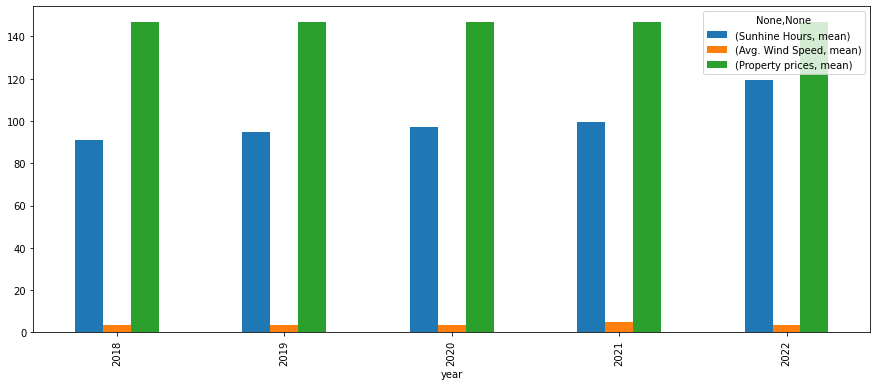

In [ ]:
df.groupby("year")["Sunhine Hours",	
                   "Avg. Wind Speed",	
                   "Property prices"].agg({"mean"}).plot(kind = "bar", figsize = (15,6))

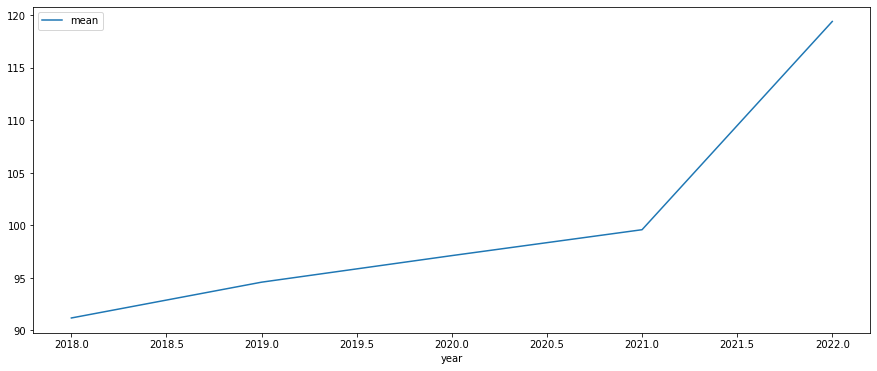

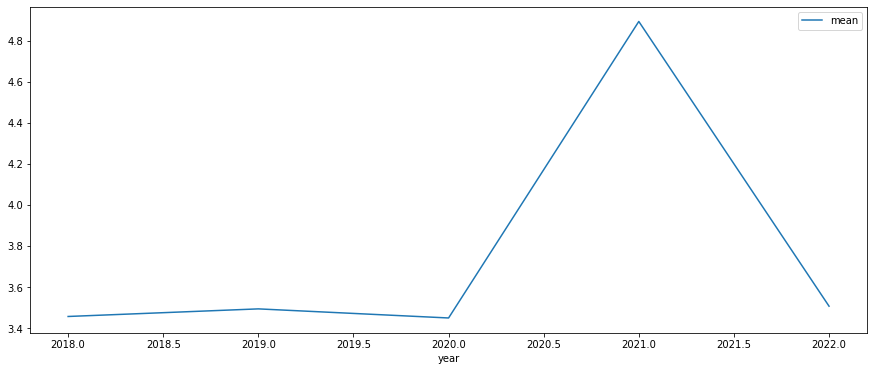

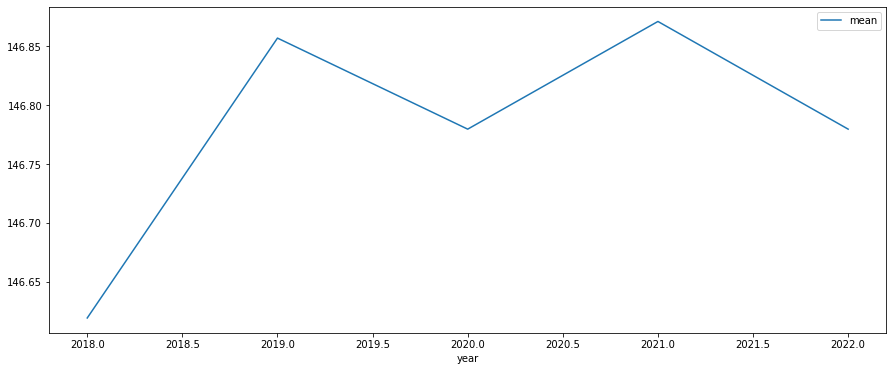

In [ ]:
# Sunhine Hours
df.groupby("year")["Sunhine Hours"].agg({"mean"}).plot(figsize = (15,6))
df.groupby("year")["Avg. Wind Speed"].agg({"mean"}).plot(figsize = (15,6))
df.groupby("year")["Property prices"].agg({"mean"}).plot(figsize = (15,6))

In [ ]:
df['point'] = df[['Longitude','Latitude']].values.tolist()

# seperate regions
sw = df[(df['Longitude'] < 0.5) & (df['Latitude'] < 0.5)]
nw = df[(df['Longitude'] < 0.5) & (df['Latitude'] > 0.5)]
ne = df[(df['Longitude'] > 0.5) & (df['Latitude'] > 0.5)]
se = df[(df['Longitude'] > 0.5) & (df['Latitude'] < 0.5)]

sw_center = get_centermost_point(sw['point'].tolist())
nw_center = get_centermost_point(nw['point'].tolist())
ne_center = get_centermost_point(ne['point'].tolist())
se_center = get_centermost_point(se['point'].tolist())

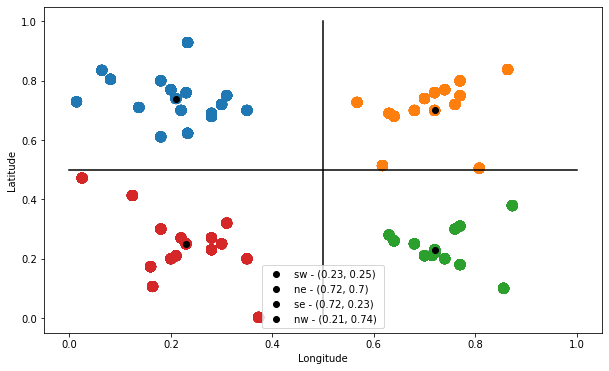

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(nw['Longitude'], nw['Latitude'], edgecolor='None', alpha=0.7, s=120)
plt.scatter(ne['Longitude'], ne['Latitude'], edgecolor='None', alpha=0.7, s=120)
plt.scatter(se['Longitude'], se['Latitude'], edgecolor='None', alpha=0.7, s=120)
plt.scatter(sw['Longitude'], sw['Latitude'], edgecolor='None', alpha=0.7, s=120)
plt.scatter(sw_center[0], sw_center[1], label = f"sw - {sw_center} ", c='black')
plt.scatter(ne_center[0], ne_center[1], label = f"ne - {ne_center} ", c = 'black')
plt.scatter(se_center[0], se_center[1], label = f"se - {se_center} ", c = 'black')
plt.scatter(nw_center[0], nw_center[1], label = f"nw - {nw_center} ", c = 'black')
plt.plot([0, 1.0], [0.5, 0.5], 'k-') # draw x-axis
plt.plot([0.5, 0.5], [0, 1.0], 'k-') # draw y-axis
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [ ]:
df.groupby(["Longitude", "Latitude"])['Property prices'].agg(['sum', 'count'])


,,sum,count
Longitude,Latitude,,
0.014,0.729,3752.0,56
0.025,0.472,6496.0,56
0.064,0.835,5096.0,56
0.081,0.805,3640.0,56
0.124,0.413,7056.0,56
0.137,0.710,4816.0,56
0.160,0.173,7150.0,55
0.164,0.106,5320.0,56
0.180,0.300,18256.0,56


In [ ]:
df.groupby(["Longitude", "Latitude"])['Sunhine Hours'].agg(['sum', 'count'])

,,sum,count
Longitude,Latitude,,
0.014,0.729,5399.0000,56
0.025,0.472,5280.9600,56
0.064,0.835,5317.9800,56
0.081,0.805,5277.9000,56
0.124,0.413,5415.9200,56
0.137,0.710,5510.5000,56
0.160,0.173,5333.7600,55
0.164,0.106,5232.6800,56
0.180,0.300,6025.7025,56


In [ ]:
solar_2000 = solar[solar["Size Solar Panel m2"] <= 2000]
solar_3000 = solar[solar["Size Solar Panel m2"] <= 3000]

In [ ]:
solar_3000

,Model ID,Sunshine Hours per year,Size Solar Panel m2,Generated energy kWh/a
0,1,1418,794,233616
1,2,1474,1726,525410
4,5,1320,2085,576313
6,7,1406,81,23656
8,9,1133,449,108842
9,10,1313,903,248448
15,16,1394,2509,727268
18,19,1137,2912,708013


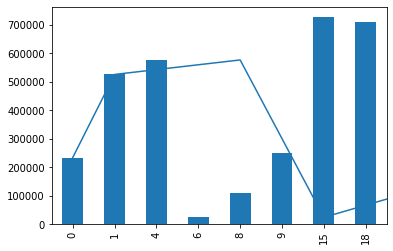

In [ ]:
solar_3000['Generated energy kWh/a'].plot()
solar_3000['Generated energy kWh/a'].plot(kind = "bar")


927600

In [ ]:
nw

,index,Date,Longitude,Latitude,Sunhine Hours,Avg. Wind Speed,Property prices,year,month,day,week,point
10,10,2018-01-01,0.220,0.700,34.83,2.504,174.0,2018,1,1,1,"[0.22, 0.7]"
11,11,2018-01-01,0.280,0.680,38.88,3.176,131.0,2018,1,1,1,"[0.28, 0.68]"
12,12,2018-01-01,0.280,0.690,39.69,3.792,330.0,2018,1,1,1,"[0.28, 0.69]"
13,13,2018-01-01,0.350,0.700,32.40,2.760,277.0,2018,1,1,1,"[0.35, 0.7]"
14,14,2018-01-01,0.180,0.800,32.40,2.784,276.0,2018,1,1,1,"[0.18, 0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3288,3292,2022-08-01,0.137,0.710,180.80,3.150,86.0,2022,8,1,31,"[0.137, 0.71]"
3289,3293,2022-08-01,0.064,0.835,127.20,2.826,91.0,2022,8,1,31,"[0.064, 0.835]"
3291,3295,2022-08-01,0.014,0.729,176.00,3.033,67.0,2022,8,1,31,"[0.014, 0.729]"
3297,3301,2022-08-01,0.233,0.623,122.40,3.015,73.0,2022,8,1,31,"[0.233, 0.623]"


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.optimize import minimize
from shapely.geometry import Point

def create_model(data, long_bound, lat_bound, long_init, lat_init):
  X = data.loc[:, ["Longitude", "Latitude", "Sunhine Hours", "Avg. Wind Speed"]]
  y = data.loc[:, "Property prices"]
  
  rf = RandomForestRegressor()

  random_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, 70, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200, 400, 800, 1000]
  }

  model = RandomizedSearchCV(estimator = rf, 
                            param_distributions = random_grid, 
                            n_iter = 50, cv = 3, 
                            verbose= 1,
                            n_jobs= 2,
                            random_state=42).fit(X,y)


  # Use optimization to find the optimal price
  def profit_function(params):
    longitude, latitude, sunshine_hours, avg_wind_speed = params
    location = Point(longitude, latitude)
    price = model.predict([[location.x, location.y, sunshine_hours, avg_wind_speed]])[0]
    return -price

  bounds = [long_bound,
            lat_bound,
            (data["Sunhine Hours"].min(), data["Sunhine Hours"].max()), 
            (data["Avg. Wind Speed"].min(), data["Avg. Wind Speed"].max())]

  # Set initial guess
  x0 = [long_init, lat_init, data["Sunhine Hours"].mean() , data["Avg. Wind Speed"].mean()]

  # Use the Nelder-Mead optimization algorithm to find the optimal location
  result = minimize(profit_function, x0=x0, bounds=bounds, method='Nelder-Mead')
  longitude, latitude, sunshine_hours, avg_wind_speed = result.x

  # Create a point object to represent the location
  location = Point(longitude, latitude)
  price = model.predict([[location.x, location.y, sunshine_hours, avg_wind_speed]])[0]

  final_results = {"price": price,
             "location": location,
             "result": result,
             "long": longitude, 
             "lat": latitude, 
             "sunshine_hours": sunshine_hours, 
             "avg_wind_speed": avg_wind_speed,
             "model": model,
             }
  return final_results

# Results

In [ ]:
para = {"north-west" : [nw, (0.0, 0.5), (0.5, 1.0), nw_center[0], nw_center[1]],
        "north-east" : [ne, (0.5, 1.0), (0.5, 1.0), ne_center[0], ne_center[1]],
        "south-west" : [sw, (0.0, 0.5), (0.0, 0.5), sw_center[0], sw_center[1]],
        "south-east" : [se, (0.5, 1.0), (0.0, 0.5), se_center[0], se_center[1]]
        }

for id, data in para.items():

  res = create_model(data = data[0], long_bound = data[1], lat_bound = data[2], long_init = data[3], lat_init = data[4])
  print(f"""___________________{id}___________________
            Location : {res.get('location')}
            Sunshine hours : {res.get('sunshine_hours')}
            Avg wind speed : {res.get('avg_wind_speed')}
            Optimal Property price for: {res.get('price')}
        
        """)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
___________________north-west___________________
            Location : POINT (0.21065625 0.74925)
            Sunshine hours : 102.39022133773659
            Avg wind speed : 4.438774329652997
            Optimal Property price for: 315.888
        
        
Fitting 3 folds for each of 50 candidates, totalling 150 fits
___________________north-east___________________
            Location : POINT (0.72 0.735)
            Sunshine hours : 95.81652618135377
            Avg wind speed : 3.5821839080459768
            Optimal Property price for: 149.0
        
        
Fitting 3 folds for each of 50 candidates, totalling 150 fits
___________________south-west___________________
            Location : POINT (0.23 0.25)
            Sunshine hours : 102.90170143027413
            Avg wind speed : 3.3558736591179983
            Optimal Property price for: 159.0
        
        
Fitting 3 folds for each of 50 candidates, totalling 1

In [ ]:
solar['Sunshine Hours per year'].plot(ax = axis[1], kind = "bar")
solar['Generated energy kWh/a'].plot(kind = "ba")

NameError: ignored

In [ ]:
nw_ss_avg_yearly = nw.groupby("month")['Sunhine Hours'].agg("mean").sum()
ne_ss_avg_yearly = ne.groupby("month")['Sunhine Hours'].agg("mean").sum()
sw_ss_avg_yearly = sw.groupby("month")['Sunhine Hours'].agg("mean").sum()
se_ss_avg_yearly = se.groupby("month")['Sunhine Hours'].agg("mean").sum()

In [ ]:
print(f"""
      nw_ss_avg_yearly: {nw_ss_avg_yearly}
      ne_ss_avg_yearly : {ne_ss_avg_yearly}
      sw_ss_avg_yearly : {sw_ss_avg_yearly}
      se_ss_avg_yearly : {se_ss_avg_yearly}""")


      nw_ss_avg_yearly: 1195.4725609243699
      ne_ss_avg_yearly : 1122.2143488612837
      sw_ss_avg_yearly : 1204.344192514124
      se_ss_avg_yearly : 1101.9248069381597


In [ ]:
def maximize_profit():
  global para
  total = 0
  for id, data in para.items():
    total = total + (data[0].groupby("year")['Sunhine Hours'].agg("mean")[-1:]*12) * res.get("price")
  return total

maximize_profit()

year
2022    765379.946619
Name: Sunhine Hours, dtype: float64